In [1]:
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import sklearn
import warnings
warnings.filterwarnings('ignore')

**Importing DataSet**

In [2]:
from pandas import read_csv

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [3]:
path=("/content/drive/MyDrive/Colab Notebooks/ML_Project/Flight_Fare.csv")
data=read_csv(path)
data

,Unnamed: 0,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955
...,...,...,...,...,...,...,...,...,...,...,...,...
300148,300148,Vistara,UK-822,Chennai,Morning,one,Evening,Hyderabad,Business,10.08,49,69265
300149,300149,Vistara,UK-826,Chennai,Afternoon,one,Night,Hyderabad,Business,10.42,49,77105
300150,300150,Vistara,UK-832,Chennai,Early_Morning,one,Night,Hyderabad,Business,13.83,49,79099
300151,300151,Vistara,UK-828,Chennai,Early_Morning,one,Evening,Hyderabad,Business,10.00,49,81585


**Data Set to DataFrame**

In [5]:
df=pd.DataFrame(data)

**Data Summarization before pre processing**

In [6]:
description = df.describe()
print(description)

          Unnamed: 0       duration      days_left          price
count  300153.000000  300153.000000  300153.000000  300153.000000
mean   150076.000000      12.221021      26.004751   20889.660523
std     86646.852011       7.191997      13.561004   22697.767366
min         0.000000       0.830000       1.000000    1105.000000
25%     75038.000000       6.830000      15.000000    4783.000000
50%    150076.000000      11.250000      26.000000    7425.000000
75%    225114.000000      16.170000      38.000000   42521.000000
max    300152.000000      49.830000      49.000000  123071.000000


**Drop Unnamed Column**

In [7]:
df=data.drop('Unnamed: 0',axis=1)
df.head()

,airline,flight,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price
0,SpiceJet,SG-8709,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953
1,SpiceJet,SG-8157,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953
2,AirAsia,I5-764,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956
3,Vistara,UK-995,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955
4,Vistara,UK-963,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955


**Split Flight Column**

In [8]:
df[["flight_company","flight_no"]]=df["flight"].str.split('-',expand=True)
df.drop(['flight'],axis=1,inplace=True)

In [9]:
df=df.drop('flight_company',axis=1)
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,flight_no
0,SpiceJet,Delhi,Evening,zero,Night,Mumbai,Economy,2.17,1,5953,8709
1,SpiceJet,Delhi,Early_Morning,zero,Morning,Mumbai,Economy,2.33,1,5953,8157
2,AirAsia,Delhi,Early_Morning,zero,Early_Morning,Mumbai,Economy,2.17,1,5956,764
3,Vistara,Delhi,Morning,zero,Afternoon,Mumbai,Economy,2.25,1,5955,995
4,Vistara,Delhi,Morning,zero,Morning,Mumbai,Economy,2.33,1,5955,963


**Data Information**

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300153 entries, 0 to 300152
Data columns (total 11 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   airline           300153 non-null  object 
 1   source_city       300153 non-null  object 
 2   departure_time    300153 non-null  object 
 3   stops             300153 non-null  object 
 4   arrival_time      300153 non-null  object 
 5   destination_city  300153 non-null  object 
 6   class             300153 non-null  object 
 7   duration          300153 non-null  float64
 8   days_left         300153 non-null  int64  
 9   price             300153 non-null  int64  
 10  flight_no         300153 non-null  object 
dtypes: float64(1), int64(2), object(8)
memory usage: 25.2+ MB


In [11]:
df.columns

Index(['airline', 'source_city', 'departure_time', 'stops', 'arrival_time',
       'destination_city', 'class', 'duration', 'days_left', 'price',
       'flight_no'],
      dtype='object')

**Null Values**

In [12]:
df.isna().sum()

airline             0
source_city         0
departure_time      0
stops               0
arrival_time        0
destination_city    0
class               0
duration            0
days_left           0
price               0
flight_no           0
dtype: int64

# **Visualization**

**Flights Count of Different Airlines**

In [ ]:
df1=df.groupby(['flight_no','airline'],as_index=False).count()
df1.airline.value_counts()

Indigo       704
Air_India    218
GO_FIRST     205
SpiceJet     186
Vistara      133
AirAsia      115
Name: airline, dtype: int64

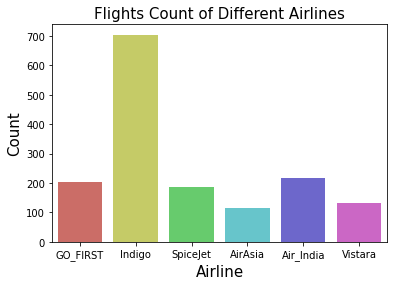

In [ ]:
sns.countplot(df1['airline'],palette='hls')
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

**Classes of Different Airline**s

In [ ]:
df2=df.groupby(['flight_no','airline','class'],as_index=False).count()
df2['class'].value_counts()

Economy     1560
Business     295
Name: class, dtype: int64

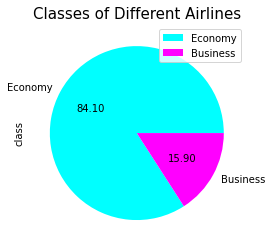

In [ ]:
df2['class'].value_counts().plot(kind='pie',textprops={'color':'black'},autopct='%.2f',cmap='cool')
plt.title('Classes of Different Airlines',fontsize=15)
plt.legend(['Economy','Business'])
plt.show()

**Airlines Vs Price**

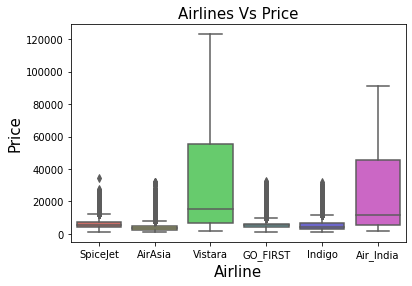

In [ ]:
sns.boxplot(x=df['airline'],y=df['price'],palette='hls')
plt.title('Airlines Vs Price',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

**Class Vs Ticket Price**

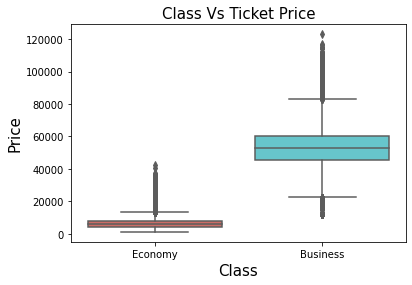

In [ ]:
sns.boxplot(x='class',y='price',data=df,palette='hls')
plt.title('Class Vs Ticket Price',fontsize=15)
plt.xlabel('Class',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

**Stops Vs Ticket Price**

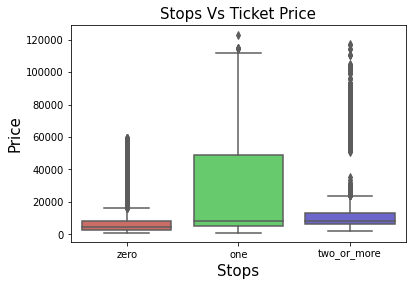

In [ ]:
sns.boxplot(x='stops',y='price',data=df,palette='hls')
plt.title('Stops Vs Ticket Price',fontsize=15)
plt.xlabel('Stops',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

**Flights Count at different departure time**

In [ ]:
df3=df.groupby(['flight_no','airline','departure_time'],as_index=False).count()
df3['departure_time'].value_counts()

Early_Morning    391
Evening          370
Morning          356
Afternoon        321
Night            223
Late_Night        23
Name: departure_time, dtype: int64

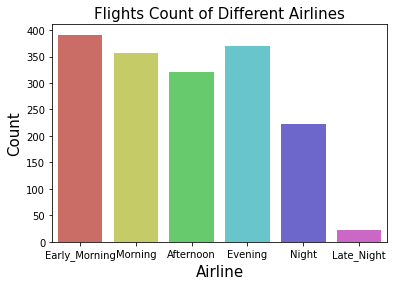

In [ ]:
sns.countplot(df3['departure_time'],palette='hls')
plt.title('Flights Count of Different Airlines',fontsize=15)
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Count',fontsize=15)
plt.show()

**Departure Time Vs Ticket Price**

In [ ]:
df3=df.groupby(['flight_no','airline','departure_time'],as_index=False).count()
df3['departure_time'].value_counts()

Early_Morning    391
Evening          370
Morning          356
Afternoon        321
Night            223
Late_Night        23
Name: departure_time, dtype: int64

Text(0, 0.5, 'Price')

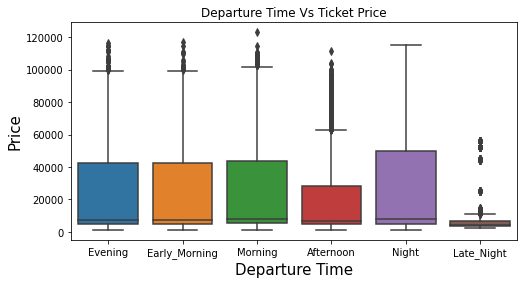

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='departure_time',y='price',data=df)
plt.title('Departure Time Vs Ticket Price',fontsize=12)
plt.xlabel('Departure Time',fontsize=15)
plt.ylabel('Price',fontsize=15)

**Arrival Time Vs Ticket Price**

In [ ]:
df3=df.groupby(['flight_no','airline','departure_time'],as_index=False).count()
df3['departure_time'].value_counts()

Early_Morning    391
Evening          370
Morning          356
Afternoon        321
Night            223
Late_Night        23
Name: departure_time, dtype: int64

**Arrival Time Vs Ticket Price**

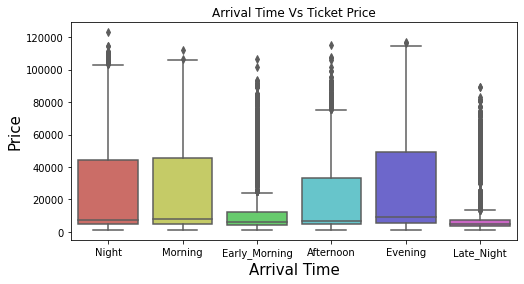

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='arrival_time',y='price',data=df,palette='hls')
plt.title('Arrival Time Vs Ticket Price',fontsize=12)
plt.xlabel('Arrival Time',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

**Source City Vs Ticket Price**

Text(0, 0.5, 'Price')

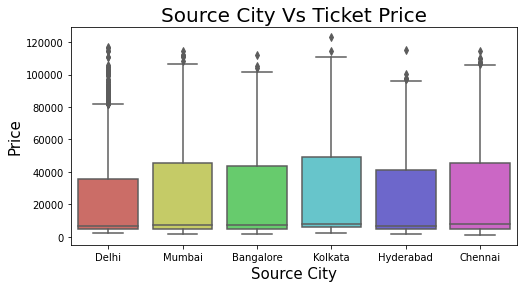

In [ ]:
plt.figure(figsize=(8,4))
sns.boxplot(x='source_city',y='price',data=df,palette='hls')
plt.title('Source City Vs Ticket Price',fontsize=20)
plt.xlabel('Source City',fontsize=15)
plt.ylabel('Price',fontsize=15)

**Destination City Vs Ticket Price**

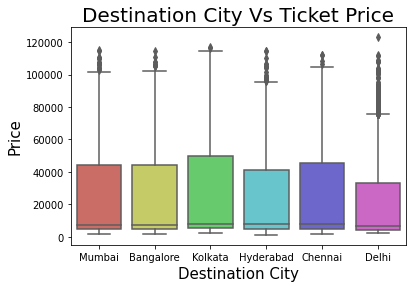

In [ ]:
sns.boxplot(x='destination_city',y='price',data=df,palette='hls')
plt.title('Destination City Vs Ticket Price',fontsize=20)
plt.xlabel('Destination City',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

**'Days Left For Departure Versus Ticket Price of each Airline**

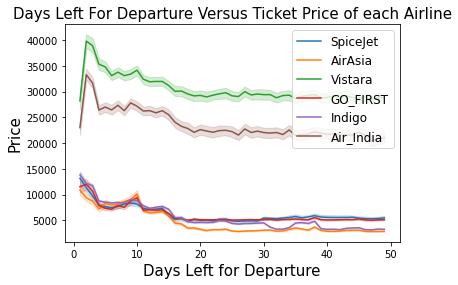

In [ ]:
sns.lineplot(data=df,x='days_left',y='price',color='blue',hue='airline')
plt.title('Days Left For Departure Versus Ticket Price of each Airline',fontsize=15)
plt.legend(fontsize=12)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

**Days Left For Departure Versus Ticket Price**

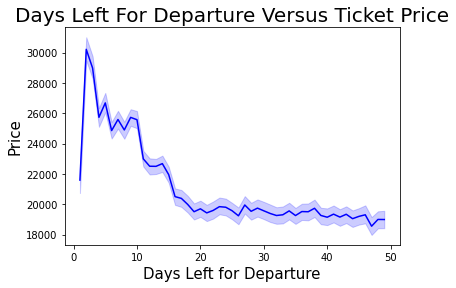

In [ ]:
sns.lineplot(data=df,x='days_left',y='price',color='blue')
plt.title('Days Left For Departure Versus Ticket Price',fontsize=20)
plt.xlabel('Days Left for Departure',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

**Ticket Price Versus Flight Duration Based on Class**

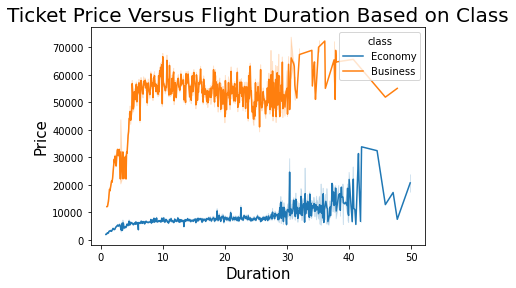

In [ ]:
sns.lineplot(data=df,x='duration',y='price',hue='class')
plt.title('Ticket Price Versus Flight Duration Based on Class',fontsize=20)
plt.xlabel('Duration',fontsize=15)
plt.ylabel('Price',fontsize=15)
plt.show()

**Price VS Airline**

([0, 1, 2, 3, 4, 5], <a list of 6 Text major ticklabel objects>)

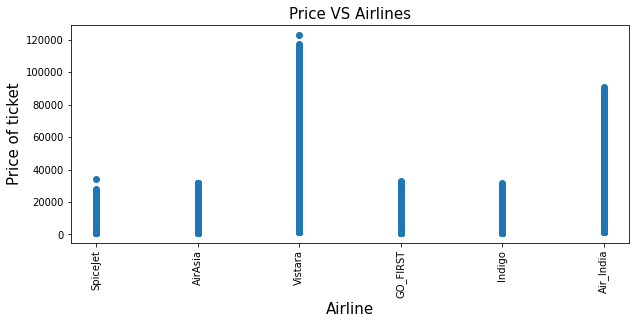

In [ ]:
plt.figure(figsize = (10,4))
plt.title('Price VS Airlines',fontsize=15)
plt.scatter(df['airline'], df['price'])
plt.xticks
plt.xlabel('Airline',fontsize=15)
plt.ylabel('Price of ticket',fontsize=15)
plt.xticks(rotation = 90)

**Heat Map**

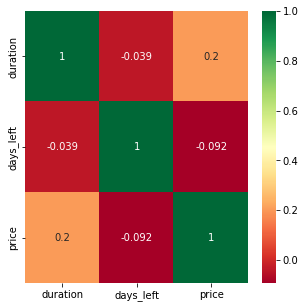

In [ ]:
plt.figure(figsize = (5,5))
sns.heatmap(df.corr(), annot = True, cmap = "RdYlGn")
plt.show()

**Text to Int Conversion**

In [13]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()
df["airline"]=le.fit_transform(df["airline"])
df["source_city"]=le.fit_transform(df["source_city"])
df["departure_time"]=le.fit_transform(df["departure_time"])
df["stops"]=le.fit_transform(df["stops"])
df["arrival_time"]=le.fit_transform(df["arrival_time"])
df["destination_city"]=le.fit_transform(df["destination_city"])
df["class"]=le.fit_transform(df["class"])
df.head()

,airline,source_city,departure_time,stops,arrival_time,destination_city,class,duration,days_left,price,flight_no
0,4,2,2,2,5,5,1,2.17,1,5953,8709
1,4,2,1,2,4,5,1,2.33,1,5953,8157
2,0,2,1,2,1,5,1,2.17,1,5956,764
3,5,2,4,2,0,5,1,2.25,1,5955,995
4,5,2,4,2,4,5,1,2.33,1,5955,963


**Discretazation**

In [14]:
from sklearn.preprocessing import KBinsDiscretizer
kbins = KBinsDiscretizer(n_bins=10, encode='ordinal', strategy='uniform')
df = kbins.fit_transform(df)

In [15]:
df=pd.DataFrame(df)
standard_description = df.describe()
print(standard_description)

                  0              1              2              3   \
count  300153.000000  300153.000000  300153.000000  300153.000000   
mean        5.783767       4.952301       4.674706       1.300890   
std         3.234008       3.235820       3.285078       3.021662   
min         0.000000       0.000000       0.000000       0.000000   
25%         2.000000       2.000000       2.000000       0.000000   
50%         6.000000       4.000000       4.000000       0.000000   
75%         9.000000       8.000000       8.000000       0.000000   
max         9.000000       9.000000       9.000000       9.000000   

                  4              5              6              7   \
count  300153.000000  300153.000000  300153.000000  300153.000000   
mean        5.843200       4.979717       6.196820       1.857866   
std         3.161672       3.229936       4.167836       1.465246   
min         0.000000       0.000000       0.000000       0.000000   
25%         4.000000       2.0000

In [16]:
df.head()

,0,1,2,3,4,5,6,7,8,9,10
0,8.0,4.0,4.0,9.0,9.0,9.0,9.0,0.0,0.0,0.0,8.0
1,8.0,4.0,2.0,9.0,8.0,9.0,9.0,0.0,0.0,0.0,8.0
2,0.0,4.0,2.0,9.0,2.0,9.0,9.0,0.0,0.0,0.0,0.0
3,9.0,4.0,8.0,9.0,0.0,9.0,9.0,0.0,0.0,0.0,0.0
4,9.0,4.0,8.0,9.0,8.0,9.0,9.0,0.0,0.0,0.0,0.0


**Normalization**

In [17]:
from sklearn.preprocessing import MinMaxScaler
scalar=MinMaxScaler(feature_range=(0,1))
df=scalar.fit_transform(df)

In [18]:
X=df[:,0:8]
Y=df[:,8]

In [19]:
df=pd.DataFrame(df)
scalar_description = df.describe()
print(scalar_description)

                  0              1              2              3   \
count  300153.000000  300153.000000  300153.000000  300153.000000   
mean        0.642641       0.550256       0.519412       0.144543   
std         0.359334       0.359536       0.365009       0.335740   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.222222       0.222222       0.222222       0.000000   
50%         0.666667       0.444444       0.444444       0.000000   
75%         1.000000       0.888889       0.888889       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

                  4              5              6              7   \
count  300153.000000  300153.000000  300153.000000  300153.000000   
mean        0.649244       0.553302       0.688536       0.206430   
std         0.351297       0.358882       0.463093       0.162805   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.444444       0.2222

In [20]:
df

,0,1,2,3,4,5,6,7,8,9,10
0,0.888889,0.444444,0.444444,1.0,1.000000,1.000000,1.0,0.000000,0.0,0.000000,0.888889
1,0.888889,0.444444,0.222222,1.0,0.888889,1.000000,1.0,0.000000,0.0,0.000000,0.888889
2,0.000000,0.444444,0.222222,1.0,0.222222,1.000000,1.0,0.000000,0.0,0.000000,0.000000
3,1.000000,0.444444,0.888889,1.0,0.000000,1.000000,1.0,0.000000,0.0,0.000000,0.000000
4,1.000000,0.444444,0.888889,1.0,0.888889,1.000000,1.0,0.000000,0.0,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...
300148,1.000000,0.222222,0.888889,0.0,0.444444,0.666667,0.0,0.111111,1.0,0.555556,0.000000
300149,1.000000,0.222222,0.000000,0.0,1.000000,0.666667,0.0,0.111111,1.0,0.666667,0.000000
300150,1.000000,0.222222,0.222222,0.0,1.000000,0.666667,0.0,0.222222,1.0,0.666667,0.000000
300151,1.000000,0.222222,0.222222,0.0,0.444444,0.666667,0.0,0.111111,1.0,0.666667,0.000000


**Data Summarization**

In [21]:
description = df.describe()
print(description)

                  0              1              2              3   \
count  300153.000000  300153.000000  300153.000000  300153.000000   
mean        0.642641       0.550256       0.519412       0.144543   
std         0.359334       0.359536       0.365009       0.335740   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.222222       0.222222       0.222222       0.000000   
50%         0.666667       0.444444       0.444444       0.000000   
75%         1.000000       0.888889       0.888889       0.000000   
max         1.000000       1.000000       1.000000       1.000000   

                  4              5              6              7   \
count  300153.000000  300153.000000  300153.000000  300153.000000   
mean        0.649244       0.553302       0.688536       0.206430   
std         0.351297       0.358882       0.463093       0.162805   
min         0.000000       0.000000       0.000000       0.000000   
25%         0.444444       0.2222

**Output CSV**

In [22]:
df.to_csv('output.csv', index=False)

**Summary**

1.	Airline Fare Price Predictions has airline: descries Airline Name, source City: Source City of
Flight, departure Time: Departure Time of Flight, stops: No of connecting cities, arrival Time
:Arrival Time of Flights, destination city : Destination City of Flight, class: Travel Class(Economy
Business), duration: Time taken by Flight, days left: No of days left for Departure , as features and 
price: Ticket cost as output
2.Arrival and Departure Times, Source and Destination Cities, Days until departure have a significant impact on ticket prices. Tickets for business class cost more than those for economy. Because there are fewer major flights on Indigo, its fare is lower than Vistara's. Flights with a single stopover are more expensive than other flights.As the number of departure days reduces, the cost of the ticket rises.

# **Test_Train**

In [23]:
x=df.drop([9],axis=1)
y=df[9]

**Data Splitting**

In [24]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.20) 

In [ ]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=1, shuffle = True)

# **Algorithm** 

**Linear Regression**

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression()
regressor.fit(X_train, y_train)
y_pred = regressor.predict(X_test)

In [26]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=1, shuffle = True)

In [27]:
from sklearn.metrics import classification_report, confusion_matrix  ,accuracy_score
regressor_Accuracy=regressor.score(X_test, y_test)*100
print(f'The Accuracy of the Model is {regressor_Accuracy}')

The Accuracy of the Model is 89.03416662422143


**Decision tree**

In [28]:
from sklearn.tree import DecisionTreeRegressor
Decision_regressor=DecisionTreeRegressor()
Decision_regressor.fit(X_train, y_train)
y_pred = Decision_regressor.predict(X_test)

In [29]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=1, shuffle = True)

In [30]:
from sklearn.metrics import classification_report, confusion_matrix  ,accuracy_score
Decision_tree_Accuracy=Decision_regressor.score(X_test, y_test)*100
print(f'The Accuracy of the Model is {Decision_tree_Accuracy}')

The Accuracy of the Model is 96.42621063321965


**Random Forest**

In [31]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.datasets import make_regression
random= RandomForestRegressor(max_depth=2, random_state=0)
random.fit(X_train, y_train)
y_pred = random.predict(X_test)

In [34]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=1, shuffle = True)

In [35]:
from sklearn.metrics import classification_report, confusion_matrix  ,accuracy_score
Random_Forest_Accuracy=random.score(X_test, y_test)*100
print(f'The Accuracy of the Model is {Random_Forest_Accuracy}')

The Accuracy of the Model is 91.65150511902436


**Nueral MultiLayer Perceptron(ReLu)**

In [36]:
from sklearn.neural_network import MLPRegressor
neural = MLPRegressor(random_state=1, max_iter=1000).fit(X_train, y_train)
y_pred = neural.predict(X_test)

In [37]:
from sklearn.model_selection import KFold
kfold = KFold(n_splits=10, random_state=1, shuffle = True)

In [38]:
from sklearn.metrics import classification_report, confusion_matrix  ,accuracy_score
Neural_Accuracy=neural.score(X_test, y_test)*100
print(f'The Accuracy of the Model is {Neural_Accuracy}')

The Accuracy of the Model is 94.47878508365503


**k-nearest neighbor**

The Accuracy of the Model for k = 1 is 94.1701384913375
The Accuracy of the Model for k = 3 is 95.97699198287519
The Accuracy of the Model for k = 5 is 96.30592468149213
The Accuracy of the Model for k = 7 is 96.4252104450849
The Accuracy of the Model for k = 9 is 96.45018627563657
The Accuracy of the Model for k = 11 is 96.43073454948434
The Accuracy of the Model for k = 13 is 96.39919874675206
The Accuracy of the Model for k = 15 is 96.34978297924951


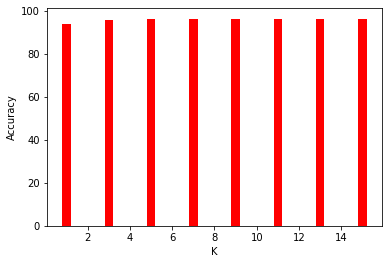

In [39]:
from sklearn.neighbors import KNeighborsRegressor  
import matplotlib.pyplot as plt
bar_data = {}
for i in range(1,16,2):
    regressor = KNeighborsRegressor(n_neighbors=i)
    regressor.fit(X_train,y_train)
    y_pred = regressor.predict(X_test)
    accuracy = regressor.score(X_test,y_test)
    bar_data[i] = accuracy*100
    print(f'The Accuracy of the Model for k = {i} is {accuracy*100}')

x_axis = list(bar_data.keys())
y_axis = list(bar_data.values())
plt.xlabel("K")
plt.ylabel("Accuracy")
plt.bar(x_axis,y_axis,width=0.4,color='red')
plt.show()

In [40]:
from sklearn.neighbors import KNeighborsRegressor
knn_regressor = KNeighborsRegressor(n_neighbors=9)  
knn_regressor.fit(X_train, y_train)
y_pred = knn_regressor.predict(X_test)
knn_accuracy = (knn_regressor.score(X_test,y_test)*100)

**Comparing Models**

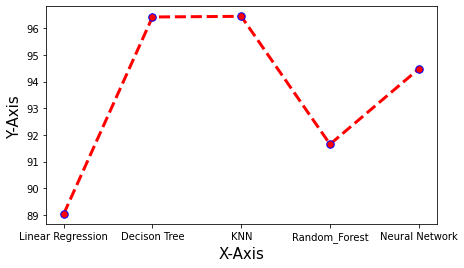

In [41]:
x=['Linear Regression','Decison Tree','KNN','Random_Forest','Neural Network']
y=[regressor_Accuracy,Decision_tree_Accuracy,knn_accuracy,Random_Forest_Accuracy,Neural_Accuracy]

#Height and Width
size = plt.figure()
size.set_figwidth(7)
size.set_figheight(4)

## Label , Line Proporties and marker Properties
plt.plot(x,y,label='line width is 5x',linewidth=3,linestyle="--",color="red",marker='.',markersize=15,markeredgecolor="blue")

## Adding a label and Font parameters
plt.xlabel("X-Axis",fontdict={"fontname":"monospace'","fontsize":15})
plt.ylabel("Y-Axis",fontdict={"fontname":"monospace'","fontsize":15})


## To Show Plot(Else will get unnecessary address)
plt.show() 